In [1]:
import os
import json
from utils import load_datasets, load_target
import models
from models.tuning import beyesian_optimization
from models.evaluation import cross_validation_score
import json

n_trials = 10

In [2]:
config = json.load(open('./config/default.json'))
# X_train, X_test = load_datasets(["Age", "AgeSplit", "EducationNum"])
X_train, X_test = load_datasets(config['features'])
y_train = load_target('target')

In [3]:
# ### lightgbm
# ### 深さが浅い・中・深いものを作る

# # 浅いやつ
# lgbm = models.Lgbm({})
# optimized_params = beyesian_optimization(lgbm, X_train, y_train, {
#     'objective': 'multiclass',
#     'num_class': 10,
#     'learning_rate': [0.001, 0.1],
#     'lambda_l1': [1e-8, 10.0],
#     'lambda_l2': [1e-8, 10.0],
#     'bagging_freq': [1, 7],
#     'min_child_samples': [5, 100],
#     'learning_rate': [0.001, 0.1],
#     'max_depth': 5,
#     'random_state': 0,
#     'num_boost_round': 10000,
#     'verbosity': -100,
# }, n_trials)
# optimized_params


In [4]:
# print(optimized_params)
# print(cross_validation_score(models.Lgbm(optimized_params), X_train, y_train))
# with open('./config/Lgbm-depth-5.json', 'w') as f:
#     json.dump(optimized_params, f)


In [5]:
# ### lightgbm
# ### 深さが浅い・中・深いものを作る

# # 浅いやつ
# lgbm = models.Lgbm({})
# optimized_params = beyesian_optimization(lgbm, X_train, y_train, {
#     'objective': 'multiclass',
#     'num_class': 10,
#     'learning_rate': [0.001, 0.1],
#     'lambda_l1': [1e-8, 10.0],
#     'lambda_l2': [1e-8, 10.0],
#     'bagging_freq': [1, 7],
#     'min_child_samples': [5, 100],
#     'learning_rate': [0.001, 0.1],
#     'max_depth': 15,
#     'random_state': 0,
#     'num_boost_round': 10000,
#     'verbosity': -100,
# }, n_trials)
# optimized_params


In [6]:
# print(optimized_params)
# print(cross_validation_score(models.Lgbm(optimized_params), X_train, y_train))
# with open('./config/Lgbm-depth-15.json', 'w') as f:
#     json.dump(optimized_params, f)


In [7]:
### lightgbm
### 深さが浅い・中・深いものを作る

# 浅いやつ
lgbm = models.Lgbm({})
optimized_params = beyesian_optimization(lgbm, X_train, y_train, {
    'objective': 'multiclass',
    'num_class': 10,
    'learning_rate': [0.001, 0.1],
    'lambda_l1': [1e-8, 10.0],
    'lambda_l2': [1e-8, 10.0],
    'bagging_freq': [1, 7],
    'min_child_samples': [5, 100],
    'learning_rate': [0.001, 0.1],
    'max_depth': -1,
    'random_state': 0,
    'num_boost_round': 1000,
    'verbosity': -100,
}, n_trials)
optimized_params


[I 2022-02-23 11:30:44,440] A new study created in memory with name: no-name-220f08b3-904c-4f05-92f8-cef76b29aa0f
/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-02-23 11:36:12,748] Trial 0 finished with value: 0.09934428983574559 and parameters: {'learning_rate': 0.055332536888805156, 'lambda_l1': 7.151893666572301, 'lambda_l2': 6.0276337646888045, 'bagging_freq': 4, 'min_child_samples': 45}. Bes

{'objective': 'multiclass',
 'num_class': 10,
 'learning_rate': 0.06435218111142486,
 'lambda_l1': 1.433532882656931,
 'lambda_l2': 9.44668917104915,
 'bagging_freq': 4,
 'min_child_samples': 44,
 'max_depth': -1,
 'random_state': 0,
 'num_boost_round': 1000,
 'verbosity': -100}

In [8]:
print(optimized_params)
print(cross_validation_score(models.Lgbm(optimized_params), X_train, y_train))
with open('./config/Lgbm-depth-inf.json', 'w') as f:
    json.dump(optimized_params, f)


{'objective': 'multiclass', 'num_class': 10, 'learning_rate': 0.06435218111142486, 'lambda_l1': 1.433532882656931, 'lambda_l2': 9.44668917104915, 'bagging_freq': 4, 'min_child_samples': 44, 'max_depth': -1, 'random_state': 0, 'num_boost_round': 1000, 'verbosity': -100}


/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:239: 

0.98868


In [9]:
rf = models.RandomForest({})
optimized_params = beyesian_optimization(rf, X_train, y_train, {
    'n_estimators': [1, 1024],
    'max_depth': [1, 256],
    'min_samples_split': [2, 64],
    'min_samples_leaf': [1, 32],
    'random_state': 0
}, n_trials)

[I 2022-02-23 13:00:35,534] A new study created in memory with name: no-name-98d07916-a60b-4b02-b610-3026a5a58c41
[I 2022-02-23 13:06:12,266] Trial 0 finished with value: 0.435211419117624 and parameters: {'n_estimators': 562, 'max_depth': 184, 'min_samples_split': 39, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.435211419117624.
[I 2022-02-23 13:10:21,408] Trial 1 finished with value: 0.5090524798944512 and parameters: {'n_estimators': 434, 'max_depth': 166, 'min_samples_split': 29, 'min_samples_leaf': 29}. Best is trial 0 with value: 0.435211419117624.
[I 2022-02-23 13:20:06,412] Trial 2 finished with value: 0.45100757525284785 and parameters: {'n_estimators': 987, 'max_depth': 99, 'min_samples_split': 51, 'min_samples_leaf': 17}. Best is trial 0 with value: 0.435211419117624.
[I 2022-02-23 13:27:04,174] Trial 3 finished with value: 0.17847137623155981 and parameters: {'n_estimators': 582, 'max_depth': 237, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 3 wit

In [10]:
print(optimized_params)
print(cross_validation_score(models.RandomForest(optimized_params), X_train, y_train))
with open('./config/RandomForest.json', 'w') as f:
    json.dump(optimized_params, f)


{'n_estimators': 582, 'max_depth': 237, 'min_samples_split': 6, 'min_samples_leaf': 3, 'random_state': 0}
0.99416


In [11]:
etr = models.ERT({})
optimized_params = beyesian_optimization(etr, X_train, y_train, {
    'n_estimators': [2, 1024],
    'max_depth': [1, 256],
    'min_samples_split': [2, 64],
    'min_samples_leaf': [1, 32],
    'random_state': 0
}, n_trials)

[I 2022-02-23 14:41:20,496] A new study created in memory with name: no-name-1f1aad45-9db3-4c28-a0b0-2b16b5346f17
[I 2022-02-23 14:44:10,421] Trial 0 finished with value: 0.4561213837452121 and parameters: {'n_estimators': 563, 'max_depth': 184, 'min_samples_split': 39, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.4561213837452121.
[I 2022-02-23 14:46:15,603] Trial 1 finished with value: 0.5584812529072248 and parameters: {'n_estimators': 435, 'max_depth': 166, 'min_samples_split': 29, 'min_samples_leaf': 29}. Best is trial 0 with value: 0.4561213837452121.
[I 2022-02-23 14:51:08,048] Trial 2 finished with value: 0.466995486925935 and parameters: {'n_estimators': 987, 'max_depth': 99, 'min_samples_split': 51, 'min_samples_leaf': 17}. Best is trial 0 with value: 0.4561213837452121.
[I 2022-02-23 14:54:35,034] Trial 3 finished with value: 0.13875562849652004 and parameters: {'n_estimators': 583, 'max_depth': 237, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 3 w

In [12]:
print(optimized_params)
print(cross_validation_score(models.ERT(optimized_params), X_train, y_train))
with open('./config/ERT.json', 'w') as f:
    json.dump(optimized_params, f)


{'n_estimators': 583, 'max_depth': 237, 'min_samples_split': 6, 'min_samples_leaf': 3, 'random_state': 0}
0.994935


In [13]:
# nn = models.NN({})
# optimized_params = beyesian_optimization(nn, X_train, y_train, {
#     'layers': 4,
#     'dropout': [0.00001, 0.9],
#     'units': 10,
#     'nb_epoch': 100,
# }, 10)

In [14]:
# print(optimized_params)
# nn = models.NN(optimized_params)
# print(cross_validation_score(nn, X_train, y_train))
# with open('./config/NN-shallow.json', 'w') as f:
#     json.dump(optimized_params, f)


In [15]:
# nn = models.NN({})
# optimized_params = beyesian_optimization(nn, X_train, y_train, {
#     'layers': 10,
#     'dropout': [0.00001, 0.9],
#     'units': 20,
#     'nb_epoch': 100
# }, 10)


In [16]:
# print(optimized_params)
# nn = models.NN(optimized_params)
# # nn.save_model('./config/NN-deep.h5')
# print(cross_validation_score(nn, X_train, y_train))
# with open('./config/NN-deep.json', 'w') as f:
#     json.dump(optimized_params, f)


In [17]:
# とりあえず決め打ち
optimized_params = {
    'patience': 30,
    'layers': 2,
    'dropout': 0.1,
    'units': 100,
    'nb_epoch': 100,
    'batch_size': 256
}
nn = models.NN(optimized_params)
print(cross_validation_score(nn, X_train, y_train))
print(optimized_params)
with open('./config/NN-shallow.json', 'w') as f:
    json.dump(optimized_params, f)


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-02-23 15:29:01.781343: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-23 15:29:01.799905: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-23 15:29:01.801607: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-02-23 15:29:04.513763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is e

0.913745
{'patience': 30, 'layers': 2, 'dropout': 0.1, 'units': 100, 'nb_epoch': 100, 'batch_size': 256}


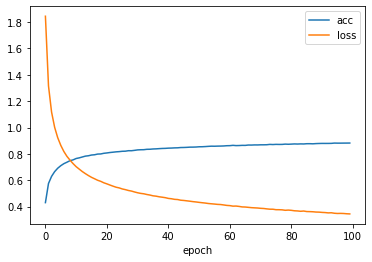

In [18]:
nn.plot()

In [19]:
# とりあえず決め打ち
optimized_params = {
    'patience': 30,
    'layers': 8,
    'dropout': 0.1,
    'units': 100,
    'nb_epoch': 1000,
    'batch_size': 256
}
nn = models.NN(optimized_params)
print(cross_validation_score(nn, X_train, y_train))
print(optimized_params)
with open('./config/NN-deep.json', 'w') as f:
    json.dump(optimized_params, f)


2022-02-23 17:35:03.295743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [ ]:
nn.plot()